# Model Tuning - Gradient Boosted Trees

In [1]:
pwd

'/Users/kelly/metis_v3/Project_3'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
import pickle
with open('beer_df_formodel.pickle','rb') as read_file:
    beer_df = pickle.load(read_file)
beer_df.head(1)

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner,style_num
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,7,0,0,0,7


In [4]:
X = beer_df.iloc[:,4:-13].drop(columns = 'brewmethod')
y = beer_df.style_num
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

# Gradient Boost

In [5]:
model_rf_gb = GradientBoostingClassifier()
model_rf_gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [6]:
model_rf_gb.score(X_test, y_test)

0.6194874851013111

**Adjust Number of Features**

In [7]:
X.head()

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,allgrain,biab,partialmash,extract
0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1,0,0,0
2,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1,0,0,0
3,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,0,0,0
4,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1,0,0,0
5,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,1,0,0,0


In [8]:
X.shape

(55933, 14)

In [9]:
X_individual = np.array(X.iloc[:,0]).reshape(-1,1)

In [10]:
X_individual_train, X_individual_test, y_train, y_test = train_test_split(X_individual, y, test_size = 0.3, random_state = 4444)

In [11]:
model_rf_gb_individual = GradientBoostingClassifier()
model_rf_gb_individual.fit(X_individual_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Check Accuracy Using Each Column Individually To Begin:

In [12]:
individual_col_accuracies = {}

for col in np.arange(X.shape[1]):
    
    X_individual = np.array(X.iloc[:,col]).reshape(-1,1)
    X_individual_train, X_individual_test, y_train, y_test = train_test_split(X_individual, y, test_size = 0.3, random_state = 4444)
    
    model_rf_gb_individual = GradientBoostingClassifier()
    model_rf_gb_individual.fit(X_individual_train, y_train)
    
    model_rf_gb_score = model_rf_gb_individual.score(X_individual_test, y_test)
    
    individual_col_accuracies[col] = model_rf_gb_score

In [13]:
for col, accuracy in individual_col_accuracies.items():
    print(X.columns[col],'\t ', col, '\t', accuracy)

size 	  0 	 0.29880810488676995
og 	  1 	 0.3696066746126341
fg 	  2 	 0.3287246722288439
abv 	  3 	 0.367818831942789
ibu 	  4 	 0.46156138259833135
color 	  5 	 0.464958283671037
boilsize 	  6 	 0.29767580452920145
boiltime 	  7 	 0.30125148986889155
boilgravity 	  8 	 0.3269964243146603
efficiency 	  9 	 0.29845053635280094
allgrain 	  10 	 0.2989868891537545
biab 	  11 	 0.2989868891537545
partialmash 	  12 	 0.2989868891537545
extract 	  13 	 0.2989868891537545


In [14]:
sorted(individual_col_accuracies.values())

[0.29767580452920145,
 0.29845053635280094,
 0.29880810488676995,
 0.2989868891537545,
 0.2989868891537545,
 0.2989868891537545,
 0.2989868891537545,
 0.30125148986889155,
 0.3269964243146603,
 0.3287246722288439,
 0.367818831942789,
 0.3696066746126341,
 0.46156138259833135,
 0.464958283671037]

Remove Columns:

In [15]:
model_rf_gb.feature_importances_

array([0.04828084, 0.0530741 , 0.08827047, 0.13410976, 0.23194387,
       0.27091523, 0.04563994, 0.04223467, 0.04576099, 0.0339317 ,
       0.00142392, 0.00091103, 0.00125807, 0.00224542])

In [16]:
#removed_columns = ['size', 'og', 'fg', 'abv', 'ibu', 'color', 'boilsize', 'boiltime', 'boilgravity', 'efficiency', 'allgrain', 'biab', 'partialmash', 'extract']

In [17]:
removed_columns = ['boilsize']#'size', 'og', 'fg', 'abv','ibu', 'color', 'boilsize', 'boiltime','boilgravity', 'efficiency', 'allgrain', 'biab', 'partialmash', 'extract']

In [18]:
X_adjusted = X.drop(columns = removed_columns )

In [19]:
X_adj_train, X_adj_test, y_train, y_test = train_test_split(X_adjusted, y, test_size = 0.3, random_state = 4444)

In [20]:
model_rf_gb_adj = GradientBoostingClassifier()
model_rf_gb_adj.fit(X_adj_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [21]:
print("Original Score:     " , '\t', model_rf_gb.score(X_test, y_test))
print("Adjusted Features Score: ",model_rf_gb_adj.score(X_adj_test, y_test))

Original Score:      	 0.6194874851013111
Adjusted Features Score:  0.6185935637663885


In [22]:
model_rf_gb_adj.score(X_adj_test, y_test)>model_rf_gb.score(X_test, y_test)

False

In [23]:
#Found no combination of column adjustments that improved the overall accuracy

**Adjust Number of Estimators**

In [24]:
model_rf_gb_2 = GradientBoostingClassifier(n_estimators = 200)
model_rf_gb_2.fit(X_train, y_train)
model_rf_gb_2.score(X_test, y_test)

0.6211561382598332

In [25]:
model_rf_gb_3 = GradientBoostingClassifier(n_estimators = 50)
model_rf_gb_3.fit(X_train, y_train)
model_rf_gb_3.score(X_test, y_test)

0.6176400476758045

In [213]:
n_range = (1,200)
n_scores = []

for n in n_range:
    
    model_rf_gb = GradientBoostingClassifier(n_estimators = n)

    scores = cross_val_score(model_rf_gb, X_train, y_train, cv=10, scoring = 'accuracy')
    n_scores.append(scores.mean())

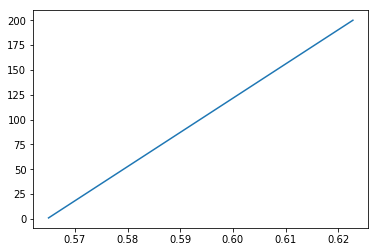

In [214]:
plt.plot(n_scores, n_range);

In [26]:
print("Increasing the number of estimators seems to increase the accuracy.")

Increasing the number of estimators seems to increase the accuracy.


Adjust Max Depth

In [ ]:
model_rf_gb_4 = GradientBoostingClassifier(max_depth = 5)
model_rf_gb_4.fit(X_train, y_train)
model_rf_gb_4.score(X_test, y_test)

In [ ]:
model_rf_gb_5 = GradientBoostingClassifier(max_depth = 2)
model_rf_gb_5.fit(X_train, y_train)
model_rf_gb_5.score(X_test, y_test)

In [ ]:
model_rf_gb_5 = GradientBoostingClassifier(max_depth = 2)
model_rf_gb_5.fit(X_train, y_train)
model_rf_gb_5.score(X_test, y_test)